In [1]:
# setup the matplotlib graphics library and configure it to show figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

In [3]:
# Simulation 1
# In a frame rotating with frequency of the incident field (Rotating Wave approximation)

In [4]:
# Assumptions

# Angle of incidence = 0 (thus, no effect of polarization)
# Incident light is monochromatic

# Considering non-interacting exciton system

In [5]:
# Constants

# h_bar = 1 (convention)
c = 1

# Exciton properties
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame
k = 0                        # TMD in-plane momentum
m = 1                        # Mass of exciton

In [42]:
# Net Hamiltonian

def exc_rho1(g, w_ex, gamma, beta):
    
    roots = np.roots([g**2, 2*g*(w_ex), (gamma**2 + (w_ex)**2), -1*(gamma**2)*(np.abs(beta)**2)])
    ne = roots[(roots - np.conj(roots))/(2*1j) == 0]
    ne = np.max(ne) 
    
    return ne

def exc_rho2(g, w_ex, gamma, beta):
    
    roots = np.roots([g**2, 2*g*(w_ex), (gamma**2 + (w_ex)**2), -1*(gamma**2)*(np.abs(beta)**2)])
    ne = roots[(roots - np.conj(roots))/(2*1j) == 0]
    ne = np.min(ne)
    
    return ne

In [58]:
w = 0 * 2 * np.pi

# Incident field properties
wp = 1.0  * 2 * np.pi  # Frequency (energy) of the incident field
    
g_vec = np.linspace(0.1,10,50)

ne_vec = []

for g in g_vec:
    
    beta = np.sqrt(3.5/g)
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)

    ne = exc_rho1(g, wp, gamma, beta)
    
    ne_vec.append(ne)

Text(0.5, 1, 'Occupational Probability w.r.t g')

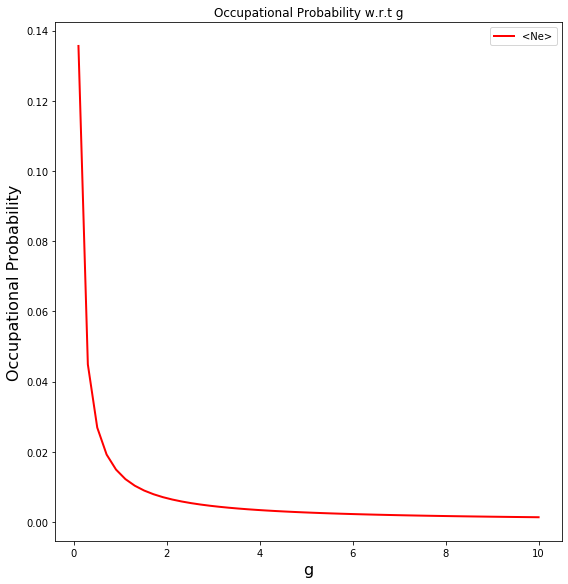

In [59]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(g_vec, ne_vec, 'r', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("g", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t g")

In [67]:
wp_vec = np.linspace(1,10,100) * 2 * np.pi

g = 1
beta = np.sqrt(3.5/g)

theta = np.pi/2

# Incident field properties
w = 0.0  * 2 * np.pi  # Frequency (energy) of the incident field

# Exciton properties
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame

ri_expt = []

ne_expt1 = []
xe_expt1 = []
ro_expt1 = []

ne_expt2 = []
xe_expt2 = []
ro_expt2 = []

for wp in wp_vec:

    w_ex = we - wp
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25 * rho
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)

    ne1 = exc_rho1(g, w_ex, gamma, beta)
    G01 = 1/(gamma - 1j*(w - (w_ex + g * ne1)))
    xe1 = -1j * np.exp(-1j * theta) * gamma * beta * G01
    r_out1 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe1
    ne_expt1.append(ne1)
    xe_expt1.append(xe1)
    ro_expt1.append(r_out1)
    
    ne2 = exc_rho2(g, w_ex, gamma, beta)
    G02 = 1/(gamma - 1j*(w - (w_ex + g * ne2)))
    xe2 = -1j * np.exp(-1j * theta) * gamma * beta * G02
    r_out2 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe2
    ne_expt2.append(ne2)
    xe_expt2.append(xe2)
    ro_expt2.append(r_out2)
    
    
    ri_expt.append(beta * np.sqrt(gamma))


rc1 = np.abs((np.array(ri_expt) - np.array(ro_expt1))/np.array(ri_expt))**2
rc2 = np.abs((np.array(ri_expt) - np.array(ro_expt2))/np.array(ri_expt))**2
print(np.max(rc1),np.max(rc2))

0.9903013246407808 0.4503524352040197


Text(0.5, 1, 'Occupational Probability w.r.t wp')

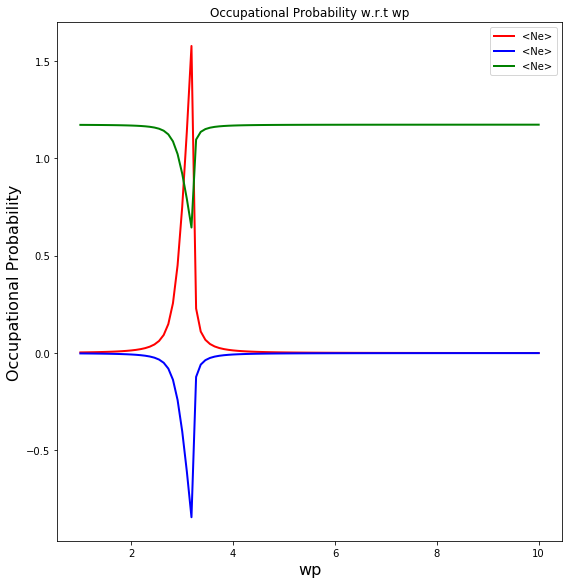

In [68]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), ne_expt2, 'r', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), xe_expt2, 'b', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), ro_expt2, 'g', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t wp")

Text(0.5, 1, 'Occupational Probability w.r.t w')

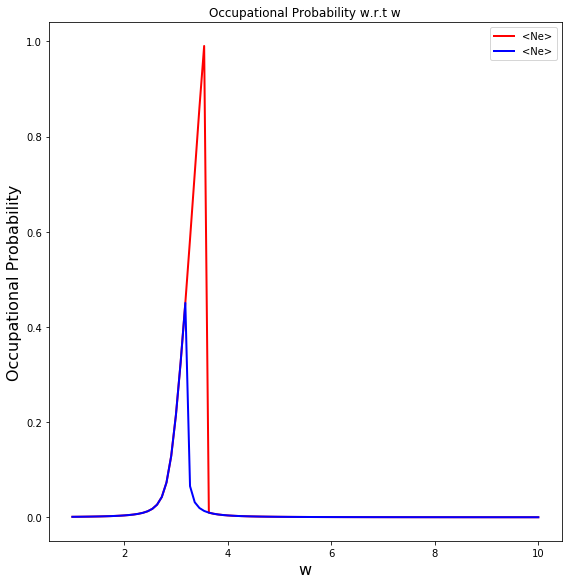

In [69]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), rc1, 'r', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), rc2, 'b', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("w", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t w")

In [53]:
wp_vec = np.linspace(1,10,100) * 2 * np.pi

g = -2
beta = np.sqrt(-3.5/g)

theta = np.pi/2

# Incident field properties
w = 0.0  * 2 * np.pi  # Frequency (energy) of the incident field

# Exciton properties
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame

ri_expt = []

ne_expt1 = []
xe_expt1 = []
ro_expt1 = []

ne_expt2 = []
xe_expt2 = []
ro_expt2 = []

for wp in wp_vec:

    w_ex = we - wp
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25 * rho
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)

    ne1 = exc_rho1(g, w_ex, gamma, beta)
    G01 = 1/(gamma - 1j*(w - (w_ex + g * ne1)))
    xe1 = -1j * np.exp(-1j * theta) * gamma * beta * G01
    r_out1 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe1
    ne_expt1.append(ne1)
    xe_expt1.append(xe1)
    ro_expt1.append(r_out1)
    
    ne2 = exc_rho2(g, w_ex, gamma, beta)
    G02 = 1/(gamma - 1j*(w - (w_ex + g * ne2)))
    xe2 = -1j * np.exp(-1j * theta) * gamma * beta * G02
    r_out2 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe2
    ne_expt2.append(ne2)
    xe_expt2.append(xe2)
    ro_expt2.append(r_out2)
    
    
    ri_expt.append(beta * np.sqrt(gamma))


rc1 = np.abs((np.array(ri_expt) - np.array(ro_expt1))/np.array(ri_expt))**2
rc2 = np.abs((np.array(ri_expt) - np.array(ro_expt2))/np.array(ri_expt))**2
print(np.max(rc1),np.max(rc2))

0.9903013246407418 0.4503524352040204


Text(0.5, 1, 'Occupational Probability w.r.t wp')

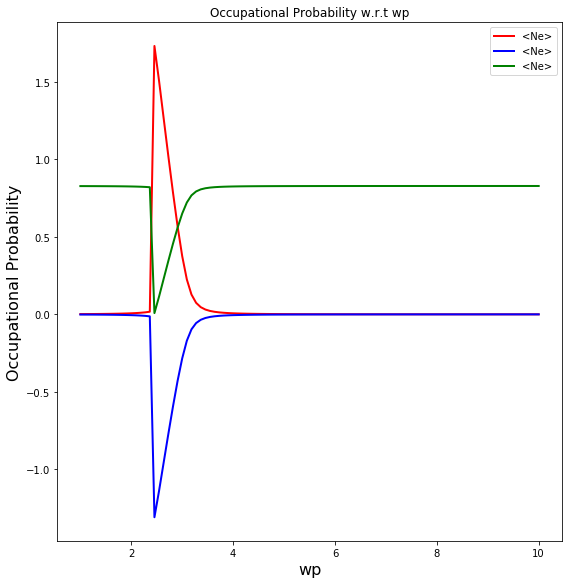

In [56]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), ne_expt1, 'r', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), xe_expt1, 'b', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), ro_expt1, 'g', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t wp")

Text(0.5, 1, 'Occupational Probability w.r.t wp')

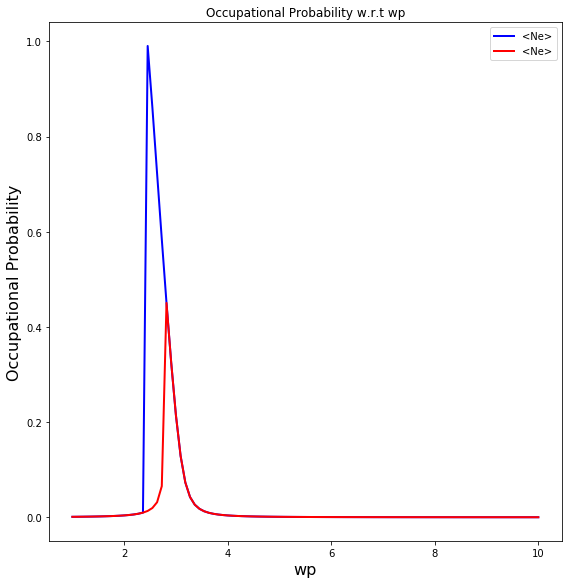

In [55]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), rc1, 'b', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), rc2, 'r', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t wp")